# INM701 Coursework
## Imtiaz Ali 200022830

The goal is to use regression to predict if a UFC fighter wins more often based on features such height to weight ratio, Significant strikes landed and absorbed, takedowns attempted and defended and also submission attempts.

4100+ records, with 18 features.


### Printing the Dataset

In [35]:
import os
import pandas as pd
import numpy as np

path = "."
filename_read = ("ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_per_15_min,takedown_acc,takedown_def,avg_sub_attempted_15_min
0,Tom Tuggle,The Law,0,3,0,187.96,113.40,NaN,Orthodox,NaN,0.00,0,2.14,0,32.14,100,0,0.00
1,Theo Rlayang,Jungle King,5,1,0,170.18,65.77,165.10,Orthodox,10/08/1994,5.93,48,8.40,40,2.00,40,0,5.93
2,Frank Shamrock,NaN,23,10,2,177.80,83.91,NaN,Orthodox,08/12/1972,4.75,53,4.66,57,0.35,50,37,4.75
3,Jason Brilz,Hitman,22,6,1,180.34,92.99,180.34,Orthodox,07/07/1975,2.66,40,1.78,65,2.37,25,25,2.66
4,Glaico Franca Moreira,Nego,15,5,0,182.88,70.31,195.58,Orthodox,28/02/1991,2.35,42,3.46,47,2.68,42,76,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,Waldo Cortes-Acosta,Salsa Boy,10,1,0,193.04,117.93,198.12,Orthodox,03/10/1991,6.97,50,4.06,52,0.00,0,60,6.97
4105,Brandon Sayles,Man of War,5,1,0,195.58,120.20,NaN,NaN,NaN,0.00,0,0.00,0,0.00,0,0,0.00
4106,Elizabeth Phillips,NaN,6,6,0,167.64,61.23,165.10,Orthodox,20/08/1986,2.60,33,3.07,58,0.75,25,53,2.60
4107,Dave Galera,Scarecrow,5,1,0,180.34,61.23,NaN,Orthodox,12/01/1978,1.67,69,0.53,33,0.00,0,14,1.67


### Drop dataset columns and fill in blank values.

In [13]:
import os
import pandas as pd
import numpy as np

#load dataset
path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Get list of all numeric columns in data set
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Calculate the current ratio of the three string values in the column
value_counts = df['stance'].value_counts(normalize=True)

# Fill empty cells with the values based on the current ratio
df['stance'] = df['stance'].fillna(pd.Series(np.random.choice(value_counts.index, p=value_counts.values, size=len(df))))

columns_to_drop = ['name', 'nickname','date_of_birth']

# Drop columns if they exist
for column_to_drop in columns_to_drop:
    if column_to_drop in df.columns:
        df.drop(column_to_drop, axis=1, inplace=True)
    else:
        print(f"Column '{column_to_drop}' not found in DataFrame.")

df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2) 
df['wld_ratio'] = df['wins'] / (df['losses'] + df['draws']).replace(0, 1)  # to avoid division by zero
df.to_csv("C:/Users/imtia/Desktop/INM701/newufc.csv", index=False)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df


,wins,losses,draws,height_cm,weight_kg,reach_in_cm,stance,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_15_min,takedown_acc,takedown_def,avg_sub_attempt_15_min,bmi,wld_ratio
0,3,1,0,193.04,83.91,182.88,Orthodox,0.91,42,2.27,28,0.00,0,0,0.91,22.517445,3.000000
1,2,2,0,193.04,102.06,182.88,Southpaw,1.03,33,4.91,38,0.00,0,25,1.03,27.388040,1.000000
2,10,4,0,190.50,92.99,195.58,Orthodox,3.12,42,4.25,52,3.00,48,66,3.12,25.623962,2.500000
3,14,4,1,177.80,65.77,177.80,Orthodox,4.74,53,4.91,54,0.29,20,50,4.74,20.804838,2.800000
4,2,3,0,187.96,92.99,182.88,Orthodox,1.09,50,9.27,19,0.00,0,100,1.09,26.321181,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,13,5,0,187.96,92.99,182.88,Orthodox,3.27,39,3.14,60,0.65,14,57,3.27,26.321181,2.600000
4105,1,3,0,177.80,52.16,182.88,Orthodox,0.00,0,0.00,0,0.00,0,0,0.00,16.499625,0.333333
4106,10,6,0,182.88,92.99,187.96,Southpaw,2.50,42,2.41,60,2.46,32,57,2.50,27.803779,1.666667
4107,31,18,1,180.34,70.31,182.88,Switch,2.03,47,4.07,35,0.43,9,57,2.03,21.618869,1.631579


### Weight categories count

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#load dataset
path = "."
filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?']) #repeat imports and data set for personal ease

# Define UFC weight categories https://www.ufc.com/news/understanding-ufc-weight-classes-and-weigh-ins
weight_categories = {
    'Strawweight': (0, 52.5),
    'Flyweight': (52.5, 56.7),
    'Bantamweight': (56.7, 61.3),
    'Featherweight': (61.3, 65.8),
    'Lightweight': (65.8, 70.3),
    'Welterweight': (70.3, 77.1),
    'Middleweight': (77.1, 83.9),
    'Light Heavyweight': (83.9, 102.1),
    'Heavyweight': (102.1, 120.2),
    'Super Heavyweight': (120.2, float('inf'))
}

# Categorize weights based on UFC weight categories
df['weight_category'] = pd.cut(df['weight_kg'], bins=[-float('inf')] + [upper for (_, upper) in weight_categories.values()],
                                labels=weight_categories.keys())

# Get the count of fighters, wins, losses, and draws in each weight category
fighters_by_weight_category = df.groupby('weight_category').agg({
    'wins': 'sum',
    'losses': 'sum',
    'draws': 'sum',
    'weight_kg': 'count' 
}).reset_index()

# Rename the columns
fighters_by_weight_category.columns = ['weight_category', 'total_wins', 'total_losses', 'total_draws', 'total_fighters']

# Print
print(fighters_by_weight_category[['weight_category', 'total_wins', 'total_losses', 'total_draws', 'total_fighters']])


     weight_category  total_wins  total_losses  total_draws  total_fighters
0        Strawweight        1173           532            9             125
1          Flyweight        3226          1249           47             290
2       Bantamweight        5454          2295          105             451
3      Featherweight        6230          2605          139             465
4        Lightweight         373           189           26              25
5       Welterweight        8590          3839          200             649
6       Middleweight        8626          3990          203             632
7  Light Heavyweight       12204          6300          278            1002
8        Heavyweight        4440          2013           65             337
9  Super Heavyweight         253           263           11              46


C:\Users\imtia\AppData\Local\Temp\ipykernel_21096\3743670143.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fighters_by_weight_category = df.groupby('weight_category').agg({


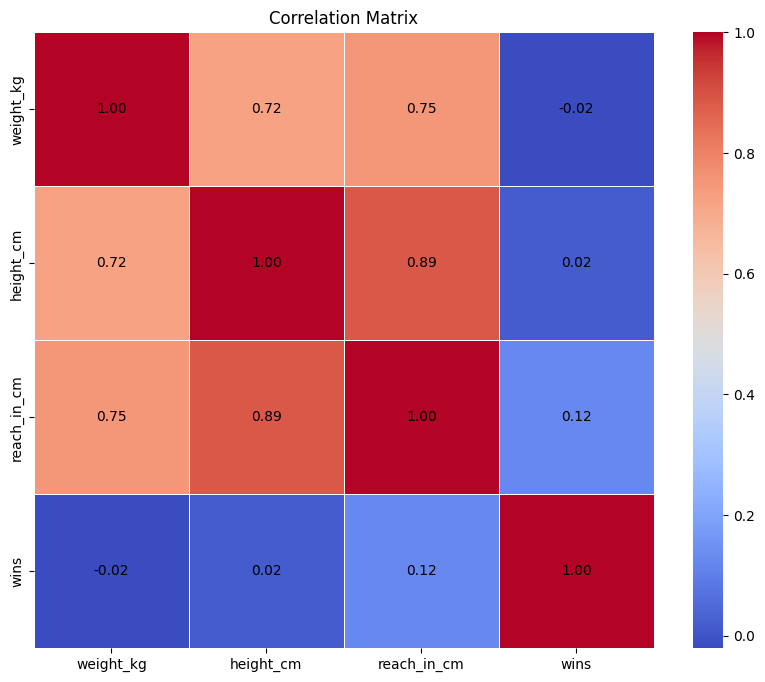

In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

#load dataset
path = "."

filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

#correlation matrix
corr_matrix = df[['weight_kg', 'height_cm','reach_in_cm','wins']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')

# adding all correlation coefficients to the squares
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', fontsize=10)

plt.show()

Cross-validated Mean MSE: 61.17774620695112
Cross-validated MSE Standard Deviation: 38.196465566163894


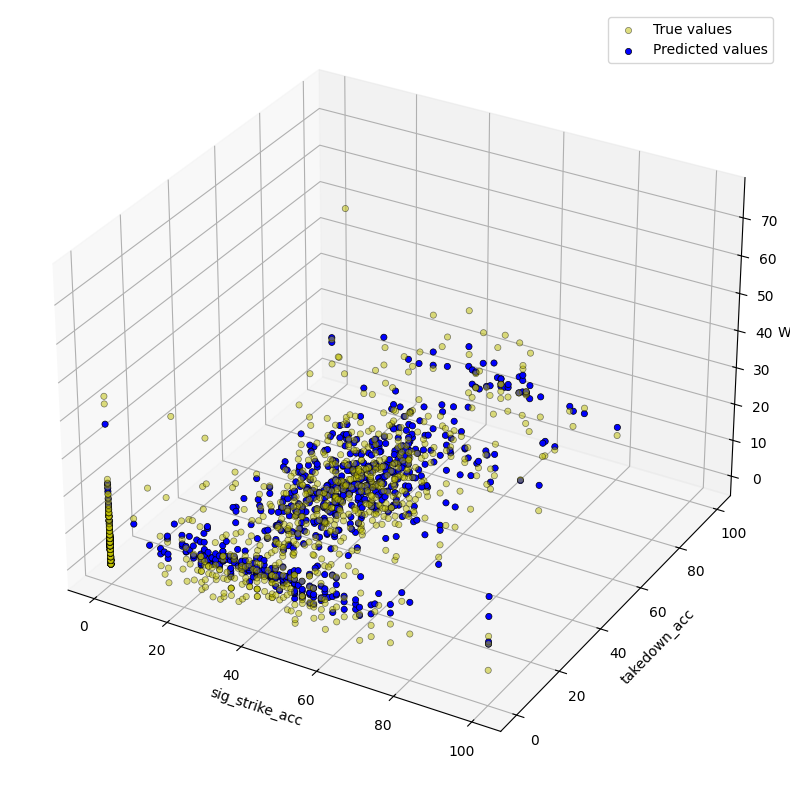

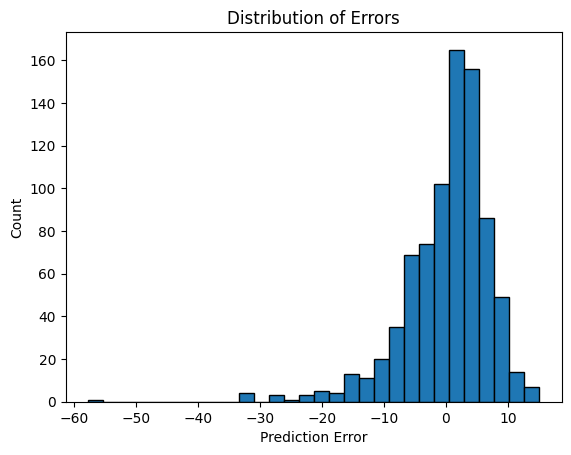

MSE for Your Model: 49.70442822384428
MSE for Baseline Model: 77.14639107556727


In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

#load dataset
path = "."
filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Get list of all numeric columns in data set
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# wins is the target variable
result = [col for col in df.columns if col != 'wins']

# Convert relevant columns to numeric
df[result] = df[result].apply(pd.to_numeric, errors='coerce')

X = df[result].values
y = df['wins'].values

# Train the K Nearest Neighbour regressor
k_neighbors = 15 #adjustable
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)

# Choose the number of folds (k)
num_folds = 10  #adjustable

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k fold cross validation
cv_results = cross_val_score(knn_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert any negative MSE to positive
cv_results = -cv_results

# Print the results
print(f'Cross-validated Mean MSE: {np.mean(cv_results)}')
print(f'Cross-validated MSE Standard Deviation: {np.std(cv_results)}')

# Split the data into training test validation, 60/20/20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes
#print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
#print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
#print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Train the KNN regression on the training set
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 6], X_test[:, 10], y_test, color='y', label='True values', alpha=0.5, edgecolors='k', linewidth=0.5)
ax.scatter(X_test[:, 6], X_test[:, 10], y_pred, color='b', label='Predicted values', alpha=1, edgecolors='k', linewidth=0.5)

ax.set_xlabel(result[6])
ax.set_ylabel(result[10])
ax.set_zlabel('Wins')

plt.legend()
plt.show()

#plot a histogram of the errors for analysis
y_pred = knn_regressor.predict(X_test)
errors = y_pred - y_test

plt.hist(errors, bins=30, edgecolor='black')
plt.title('Distribution of Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()

y_pred = knn_regressor.predict(X_test)

# Calculate MSE for my model
mse_model = mean_squared_error(y_test, y_pred)

# Create a baseline model predicting the mean
mean_wins = y_train.mean()
y_baseline = [mean_wins] * len(y_test)

# Calculate MSE for the baseline model
mse_baseline = mean_squared_error(y_test, y_baseline)

print(f'MSE for Your Model: {mse_model}')
print(f'MSE for Baseline Model: {mse_baseline}')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 12        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
62/62 [==============================] - 1s 3ms/step - loss: 245.1169 - mae: 11.9075 - val_loss: 184.9406 - val_mae: 11.0992
Epoch 2/200
62/62 [==============================] - 0s 1ms/step - loss: 209.0707 - mae: 10.4454 - val_loss: 140.3681 - val_mae: 9.3307
Epoch 3/200
62/62 [==============================] - 0s 1ms/step - loss: 162.9766 - mae: 8.6020 - val_loss: 99.4904 - val_mae: 7.6248
Epoch 4/2

Epoch 57/200
62/62 [==============================] - 0s 1ms/step - loss: 95.2888 - mae: 5.9615 - val_loss: 53.0857 - val_mae: 5.6537
Epoch 58/200
62/62 [==============================] - 0s 1ms/step - loss: 95.2317 - mae: 5.9667 - val_loss: 53.2425 - val_mae: 5.7022
Epoch 59/200
62/62 [==============================] - 0s 1ms/step - loss: 95.2958 - mae: 6.0029 - val_loss: 53.4692 - val_mae: 5.7173
Epoch 60/200
62/62 [==============================] - 0s 1ms/step - loss: 95.3987 - mae: 5.9994 - val_loss: 53.1468 - val_mae: 5.6650
Epoch 61/200
62/62 [==============================] - 0s 1ms/step - loss: 95.2292 - mae: 5.9868 - val_loss: 53.2718 - val_mae: 5.6862
Epoch 62/200
62/62 [==============================] - 0s 1ms/step - loss: 95.3178 - mae: 6.0063 - val_loss: 53.1405 - val_mae: 5.6546
Epoch 63/200
62/62 [==============================] - 0s 1ms/step - loss: 95.4976 - mae: 5.9659 - val_loss: 53.0146 - val_mae: 5.6706
Epoch 64/200
62/62 [==============================] - 0s 1ms/s

62/62 [==============================] - 0s 1ms/step - loss: 94.4677 - mae: 5.9169 - val_loss: 52.7324 - val_mae: 5.6431
Epoch 119/200
62/62 [==============================] - 0s 1ms/step - loss: 94.5962 - mae: 5.9731 - val_loss: 52.7973 - val_mae: 5.6381
Epoch 120/200
62/62 [==============================] - 0s 1ms/step - loss: 94.6024 - mae: 5.9207 - val_loss: 52.6627 - val_mae: 5.6180
Epoch 121/200
62/62 [==============================] - 0s 1ms/step - loss: 94.4354 - mae: 5.9487 - val_loss: 52.7043 - val_mae: 5.6050
Epoch 122/200
62/62 [==============================] - 0s 1ms/step - loss: 94.4430 - mae: 5.9116 - val_loss: 52.9670 - val_mae: 5.5634
Epoch 123/200
62/62 [==============================] - 0s 1ms/step - loss: 94.4608 - mae: 5.9355 - val_loss: 52.7102 - val_mae: 5.5967
Epoch 124/200
62/62 [==============================] - 0s 1ms/step - loss: 94.3672 - mae: 5.9160 - val_loss: 52.7256 - val_mae: 5.5900
Epoch 125/200
62/62 [==============================] - 0s 1ms/step - 

Epoch 179/200
62/62 [==============================] - 0s 1ms/step - loss: 94.3814 - mae: 6.0074 - val_loss: 53.0811 - val_mae: 5.5460
Epoch 180/200
62/62 [==============================] - 0s 1ms/step - loss: 94.2107 - mae: 5.8778 - val_loss: 53.0671 - val_mae: 5.6967
Epoch 181/200
62/62 [==============================] - 0s 1ms/step - loss: 94.2424 - mae: 5.9595 - val_loss: 52.6770 - val_mae: 5.6041
Epoch 182/200
62/62 [==============================] - 0s 1ms/step - loss: 94.1550 - mae: 5.9009 - val_loss: 52.9054 - val_mae: 5.6569
Epoch 183/200
62/62 [==============================] - 0s 1ms/step - loss: 94.4161 - mae: 5.9640 - val_loss: 52.7795 - val_mae: 5.5627
Epoch 184/200
62/62 [==============================] - 0s 1ms/step - loss: 94.4076 - mae: 5.8638 - val_loss: 52.7288 - val_mae: 5.5856
Epoch 185/200
62/62 [==============================] - 0s 1ms/step - loss: 94.1935 - mae: 5.9233 - val_loss: 52.7246 - val_mae: 5.6038
Epoch 186/200
62/62 [==============================] - 

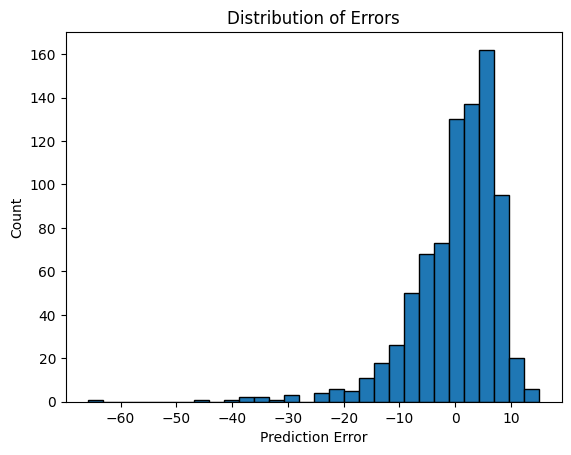

In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
path = "."
filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# wins is target variable
result = [col for col in df.columns if col != 'wins']

# Select features (columns 5 and 9 
selected_features = [result[5], result[9]]
X = df[selected_features].values
y = df['wins'].values

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Impute missing values if its necessary https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(4, input_shape=X[1].shape, activation='sigmoid'))#change activation
model.add(Dense(1)) # Output
model.summary()


# Neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(len(selected_features),)), #change activation
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for predicting wins
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']) #change optimizer

# Train the model
model.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse_model = mean_squared_error(y_test, y_pred)

# Baseline model predicting the mean
mean_wins = y_train.mean()
y_baseline = np.full_like(y_test, mean_wins)
mse_baseline = mean_squared_error(y_test, y_baseline)

# Compare the MSE values
print(f'MSE for Your Model: {mse_model}')
print(f'MSE for Baseline Model: {mse_baseline}')

# Error analysis
errors = y_pred.flatten() - y_test
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Distribution of Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()


MSE for Your Model on Validation Set: 55.09206568306559
MSE for Baseline Model on Validation Set: 84.06494090580048
Coefficient of Determination:  0.3076633834307355


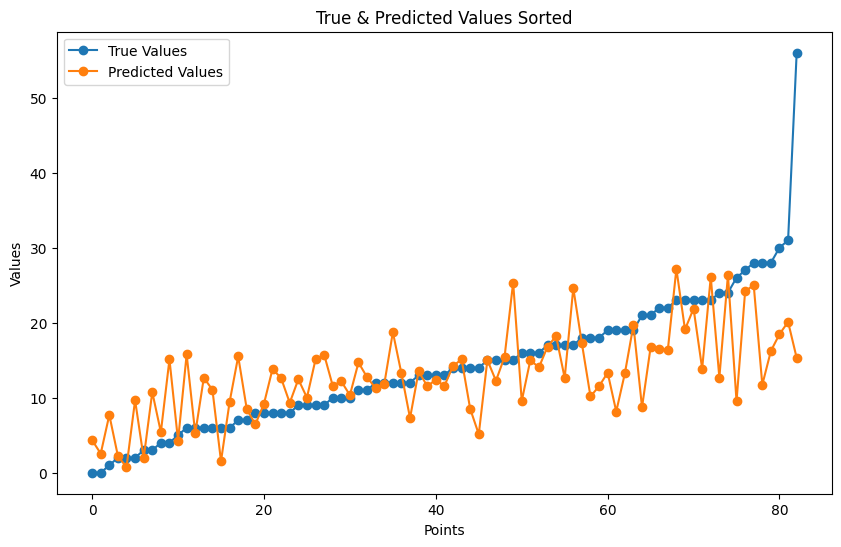

In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
path = "."
filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Set the subset size, makes the graph smaller
subset_size = 0.1
df = df.sample(frac=subset_size, random_state=42)

X = df.drop(['wins'], axis=1).values
y = df['wins'].values

#
result = [col for col in df.columns if col != 'wins']

# Convert relevant columns to numeric
df[result] = df[result].apply(pd.to_numeric, errors='coerce')

# Split the data for visualization
X_train, X_temp, y_train, y_temp = train_test_split(df[result].values, df['wins'].values, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model
Random_Forest_model = RandomForestRegressor(
    n_estimators=100,
    max_features=3,  # can change values
    max_depth=None,        # can change or set to none
    min_samples_split=2,   # can change values
    min_samples_leaf=1,    # can change values
    bootstrap=True,        # can set to false
    random_state=42
)

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# Train the model
Random_Forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = Random_Forest_model.predict(X_test)

# Calculate MSE for my model on test set
mse_model_test = mean_squared_error(y_test, y_pred_test)

# Create a baseline model predicting the mean
mean_wins = y_train.mean()
y_baseline_test = [mean_wins] * len(y_test)

# Calculate MSE for the baseline model on the validation set
mse_baseline_test = mean_squared_error(y_test, y_baseline_test)

print(f'MSE for Your Model on Validation Set: {mse_model_test}')
print(f'MSE for Baseline Model on Validation Set: {mse_baseline_test}')

#Coefficient of Determination / r^2 https://www.scribbr.com/statistics/coefficient-of-determination/
r2 = r2_score(y_test, y_pred_test)
print('Coefficient of Determination: ', r2)

# Plot true vs. predicted values using a line graph
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred_test[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='True Values', marker='o')
plt.plot(y_pred_sorted, label='Predicted Values', marker='o')
plt.title('True & Predicted Values Sorted')
plt.xlabel('Points')
plt.ylabel('Values')
plt.legend()
plt.show()